<a href="https://colab.research.google.com/github/JavierC11/Penguins_DataStudy/blob/main/AnalisisDatos_Pinguinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conociendo nuestros datos de pingüinos. 🗺🧭🐧

## Instalar librerías necesarias

```
!pip install --upgrade pip
```
```
!pip install palmerpenguins==0.1.4 numpy==1.23.4 pandas==1.5.1 seaborn==0.12.1 matplotlib==3.6.0 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.1.2 pyjanitor==0.23.1 session-info
```

## Importar librerías

In [ ]:
!pip install --upgrade pip
!pip install palmerpenguins==0.1.4 numpy pandas seaborn==0.12.1 matplotlib==3.1.3 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.0.2 pyjanitor==0.23.1 session-info

In [ ]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

## Establecer apariencia general de los gráficos

In [ ]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Cargar los datos

### Utilizando el paquete `palmerpenguins`

#### Datos crudos

In [ ]:
raw_penguins_df = palmerpenguins.load_penguins_raw()
raw_penguins_df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN
340,PAL0910,65,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.
341,PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615,Nest never observed with full clutch.
342,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN


#### Datos previamente procesados

In [ ]:
preprocess_pinguins_df = palmerpenguins.load_penguins()
preprocess_pinguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


### Utilizando los conjuntos de datos de `seaborn`

In [ ]:

pinguins_sns = sns.load_dataset('penguins')
pinguins_sns

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Utilizando la interfaz de `Deepnote`

Links de importación de datos:

- [Conjunto de datos crudos](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins_raw.csv).
- [Conjunto de datos previamente procesados](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv).

In [ ]:
##penguins_pd = pd.read_csv('/work/penguins_raw.csv')
##penguins_pd

# Colecta y validación de datos

## ¿Qué tipo de dato son las variables del conjunto de datos?

In [ ]:
preprocess_pinguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


## ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [ ]:
(
    preprocess_pinguins_df
    .dtypes
    .value_counts()
)

float64    4
object     3
int64      1
dtype: int64

## ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [ ]:
preprocess_pinguins_df.shape

(344, 8)

## ¿Existen valores nulos explícitos en el conjunto de datos?

In [ ]:
(
    preprocess_pinguins_df
    .isnull()
    .any()
)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

## De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [ ]:
(
    preprocess_pinguins_df
    .isnull()
    .sum()
)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

## ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [ ]:
(
    preprocess_pinguins_df
    .isnull()
 
 
 
    .sum()
    .sum()
)

19

## ¿Cuál es la proporción de valores nulos por cada variable?

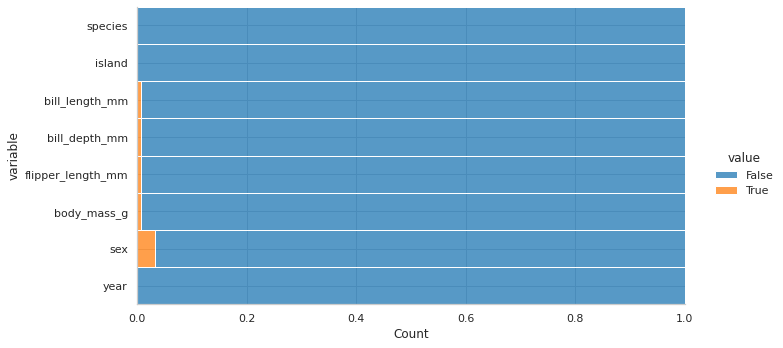

In [ ]:
(
    preprocess_pinguins_df
    .isnull()
    .melt()
    .pipe(
        lambda df:(
            sns.displot(
                data=df,
                y='variable',
                hue='value',
                multiple='fill',
                aspect=2
            )
        )
    )
)


## ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

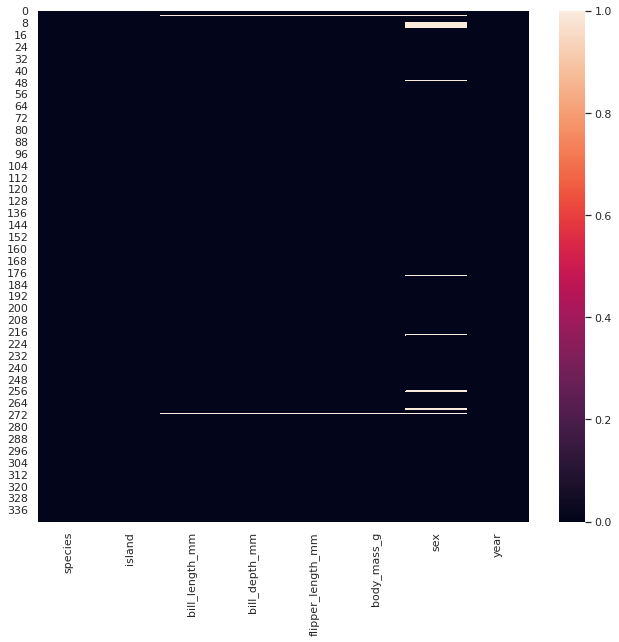

In [ ]:
(
    preprocess_pinguins_df
    .isnull()
    .pipe(
        lambda df:(
            sns.heatmap(
                data=df
   
            )
        )
    )
)


## ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [ ]:
processed_pinguins = (
    preprocess_pinguins_df
    .dropna()
)

#antes teniamos 344 y ahora 333 lineas cuanto borramos los na


# Conteos y proporciones

## Preludio: ¿Qué estadísticos describen el conjunto de datos?

### Todas las variables

In [ ]:
##si no usamos inclide all no nos mostrata los datos de las columandas que sean de texto
processed_pinguins.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


### Solo las numéricas

In [ ]:
##si no usamos inclide all no nos mostrata los datos de las columandas que sean de texto
processed_pinguins.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


### Solo categóricas - 1

In [ ]:
processed_pinguins.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


### Solo categóricas - 2

## ¿Cómo visualizar los conteos?

### Pandas

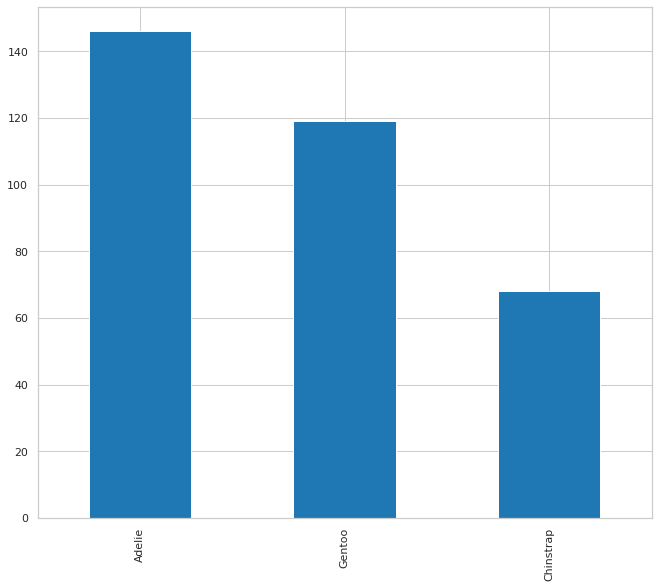

In [ ]:
(
    processed_pinguins
    .species
    .value_counts()
    .plot(
        kind='bar'
    )
)

### Seaborn

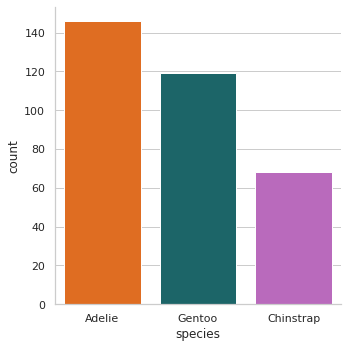

In [ ]:
sns.catplot(
    data=processed_pinguins,
    x='species',
    kind='count',
    palette=penguin_color
)

### ¿Cómo visualizar las proporciones?

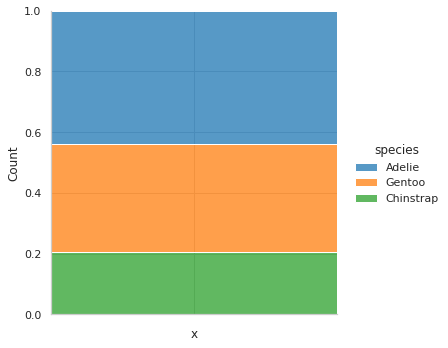

In [ ]:
 ##usaremos la libreria de siborn donde crearemos un lmbda y trabjar con el tamño de cada especie
(
    processed_pinguins
    .add_column('x', '')
    .pipe(
        lambda df: (
            sns.displot(
            data=df,
            x='x',
            hue='species',
            multiple='fill'
            )
        )
    )
)

# Medidas de tendencia central

## Media o promedio

In [ ]:
processed_pinguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


## Media o Promedio

In [ ]:
#Asi sacamos la mediana con pandas
processed_pinguins.body_mass_g.mean()

4207.057057057057

In [ ]:
#Asi podemos calcularlo en numpy
np.mean(processed_pinguins.body_mass_g)

4207.057057057057

In [ ]:
# o podemos ver la media del dataset eneteroo
processed_pinguins.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

## Mediana

In [ ]:
processed_pinguins.body_mass_g.median()

4050.0

## Moda

In [ ]:
#sacar la moda
processed_pinguins.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,male,2009


# Medidas de dispersión

## ¿Cuál es el valor máximo de las variables?

In [ ]:
processed_pinguins.max(numeric_only=True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

## ¿Cuál es el valor mínimo de las variables?

In [ ]:
processed_pinguins.min(numeric_only=True)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

## ¿Cuál es el rango de las variables?

In [ ]:
valor_maximo = processed_pinguins.max(numeric_only=True)- processed_pinguins.min(numeric_only=True)
valor_maximo

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

## ¿Cuál es la desviación estándar de las variables?

In [ ]:
#asi sacamos los cuartiles
processed_pinguins.quantile(0.25)

bill_length_mm         39.5
bill_depth_mm          15.6
flipper_length_mm     190.0
body_mass_g          3550.0
year                 2007.0
Name: 0.25, dtype: float64

In [ ]:
#este seria el 3er cuartil
processed_pinguins.quantile(0.75)

bill_length_mm         48.6
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4775.0
year                 2009.0
Name: 0.75, dtype: float64

In [ ]:
#y nuestro rango intercuartilico se calcularia
#asi sacamos los cuartiles
processed_pinguins.quantile(0.75) - processed_pinguins.quantile(0.25)

bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
year                    2.0
dtype: float64

In [ ]:
#podemos hacer una tabla donde agregemos nuestro rango intercuartilico
(
    processed_pinguins
    .quantile(q=[0.75, 0.50, 0.25])
    .transpose()
    .rename_axis('variable')
    .reset_index()
    .assign(
        iqr = lambda df: df[0.75] - df[0.25]
    )
)

,variable,0.75,0.5,0.25,iqr
0,bill_length_mm,48.6,44.5,39.5,9.1
1,bill_depth_mm,18.7,17.3,15.6,3.1
2,flipper_length_mm,213.0,197.0,190.0,23.0
3,body_mass_g,4775.0,4050.0,3550.0,1225.0
4,year,2009.0,2008.0,2007.0,2.0


HISTOGRAMA

<function matplotlib.pyplot.show(*args, **kw)>

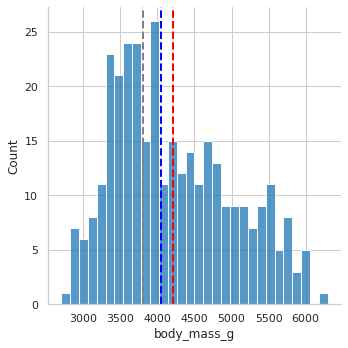

In [ ]:
#hacemos un histograma con searbon
sns.displot(
    data=processed_pinguins,
    x='body_mass_g',
    kind='hist',
    bins=30
)


#marcamos la media
plt.axvline(
    x= processed_pinguins.body_mass_g.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)

#marcamos la mediana
plt.axvline(
    x= processed_pinguins.body_mass_g.median(),
    color='blue',
    linestyle='dashed',
    linewidth=2
)

#Mode
plt.axvline(
    x=processed_pinguins.body_mass_g.mode().max(),
    color='grey',
    linestyle='dashed',
    linewidth=2
)

plt.show

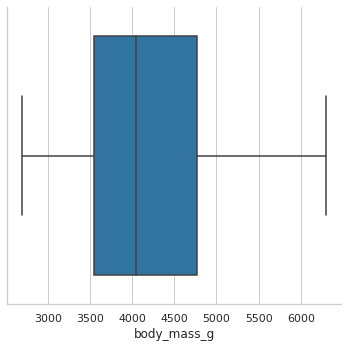

In [ ]:
sns.catplot(
    data=processed_pinguins,
    x='body_mass_g',
    kind='box'
)

In [ ]:
processed_pinguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [ ]:
# sns.scatterplot(
#     x=x,
#     y=y
# )

# fx_1 = np.array([x.min(), x.max()])
# fy_1 =  res_x_y.intercept + res_x_y.slope *  fx_1

# plt.plot(fx_1, fy_1)

In [ ]:
# sns.scatterplot(
#     x=y,
#     y=x
# )

# fx_2 = np.array([y.min(), y.max()])
# fy_2 =  res_y_x.intercept + res_y_x.slope *  fx_2

# plt.plot(fx_2, fy_2)

In [ ]:
# sns.scatterplot(
#     x=x,
#     y=y
# )

# plt.plot(fx_1, fy_1)
# plt.plot(fy_2, fx_2)

## ¿Cuál es el rango intercuartílico?

## ¿Cómo puedo visualizar la distribución de una variable?

### Histograma

### Diagrama de caja / boxplot

### Limitaciones

In [ ]:
def freedman_diaconis_bindwidth(x: pd.Series) -> float:
    """Find optimal bindwidth using Freedman-Diaconis rule."""

    IQR = x.quantile(0.75) - x.quantile(0.25)
    N = x.size

    return 2 * IQR / N ** (1 / 3)

# Distribuciones: PMFs, CDFs y PDFs

## Funciones de probabilidad de masas (PMFs)

### Utilizando `seaborn`

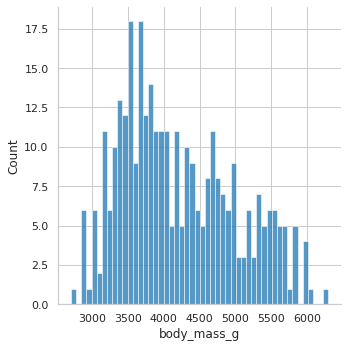

In [ ]:
sns.displot(
    data=processed_pinguins,
    x= 'body_mass_g',
    bins=50 
)

### Utilizando `empiricaldist`

In [ ]:
#empiricaldist es una libreria con la cual podemos hacer cosas parecidas a 
#searbon pero mas detalladas
#PMF: Probabilidad de que una variable aleatorio tome un valor determinado

pmf_body_mass_gg = empiricaldist.Pmf.from_seq(
    processed_pinguins.body_mass_g,
    normalize=True
)

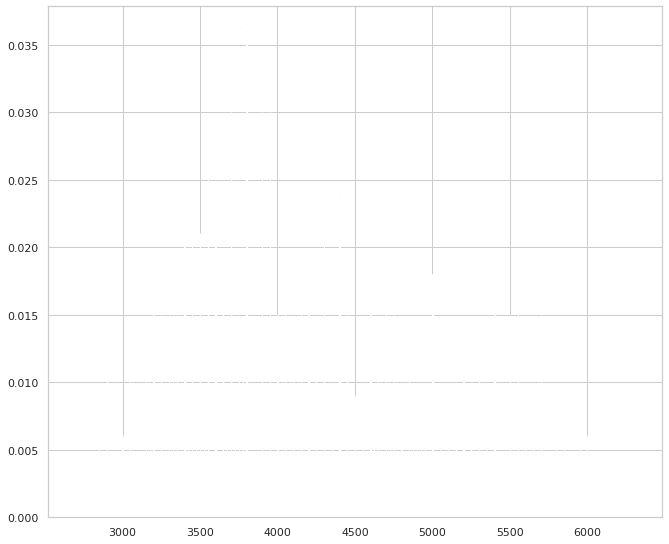

In [ ]:
pmf_body_mass_gg.bar()

In [ ]:
#podemos revisar cual es la probabilidad de que nuestra variable tenga un valor espesifico
pmf_body_mass_gg(6300)

0.003003003003003003

In [ ]:
processed_pinguins.body_mass_g.max()

6300.0

## Funciones empirícas de probabilidad acumulada (ECDFs)

Devuelve las probabilidades de que una variable sera igual o menor que un valor determinado

### Utilizando `seaborn`

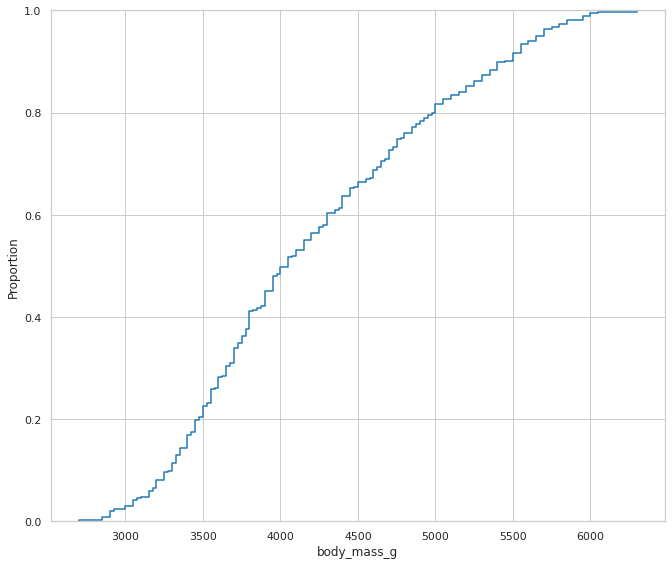

In [ ]:
#podemos usar esta grafico para saber cuanta probabilidad hay de que un valor
#sea menor aun valor por ejemplo 4000 tiene una probabilidad de l 50%
sns.ecdfplot(
    data=processed_pinguins,
    x='body_mass_g'
)

### Utilizando `empiricaldist`

In [ ]:
#Lo trabajamos con empiricaldist
cdf_body_mass_g = empiricaldist.Cdf.from_seq(
    processed_pinguins.body_mass_g,
    normalize=True
)

4000 0.4984984984984985


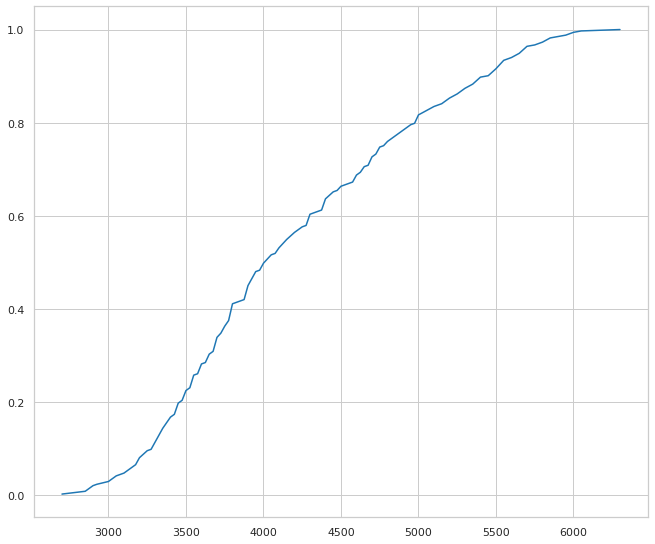

In [ ]:
cdf_body_mass_g.plot()

#si queremos revisar que sea menor a una cantidad espesifica
q=4000
p=cdf_body_mass_g.forward(q)

#vemos que tiene una probabilidad del 49% el cual se acerca de 50% que revisamos
#en searbon
print(q,p)

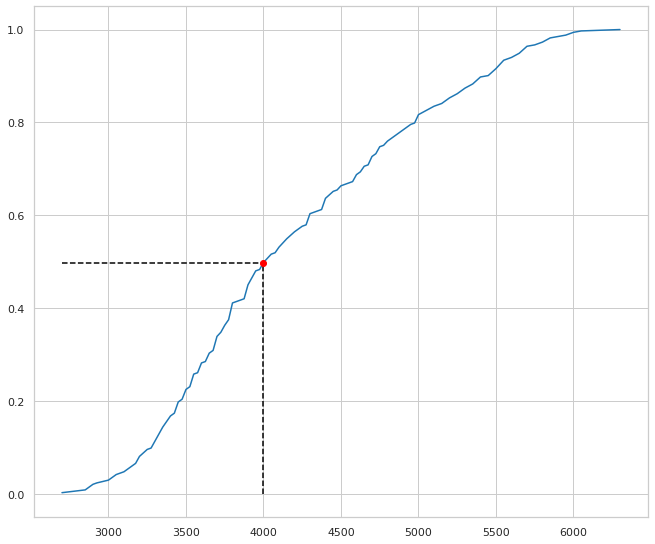

In [ ]:
#si queremos graficar un punto espesifico podemos hacerlo con el siguiente codigo
cdf_body_mass_g.plot()

q = 4000
p = cdf_body_mass_g.forward(q)

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color='black',
    linestyle='dashed'
)

plt.hlines(
    y=p,
    xmin=cdf_body_mass_g.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)

plt.plot(q,p, 'ro')

### Comparando distribuciones

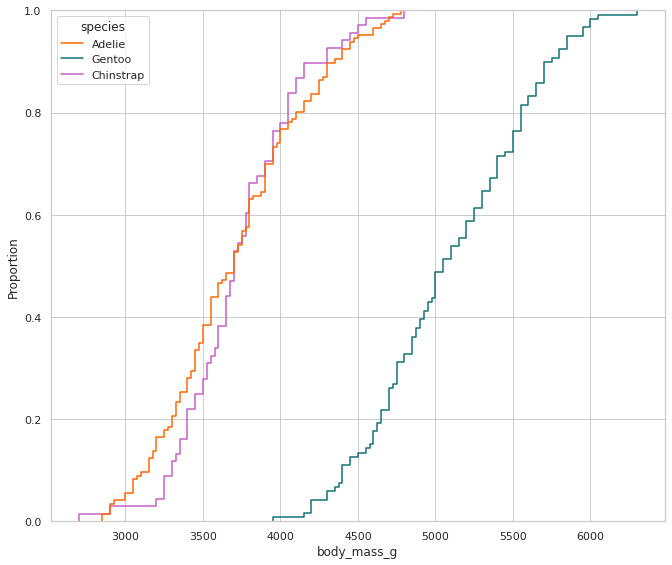

In [ ]:
#para comprar distribuciones podemos usar searbon
#con esto podemos ver la distribucion de los trres tipos de pinguinos
sns.ecdfplot(
    data=processed_pinguins,
    x='body_mass_g',
    hue='species',
    palette=penguin_color
)

## Funciones de densidad de probabilidad

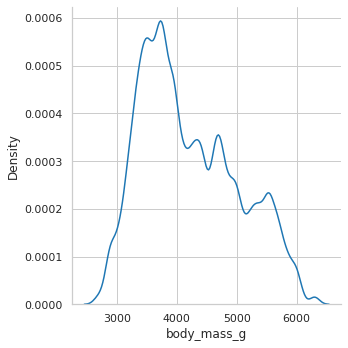

In [ ]:
#Al igual que para los histogramas y sus numeros de barras (bins)
#en estos displot es importante ajustar  nuestro bandwidth pues nos ayudara
#a ver de manera correcta nuestras curvas

sns.displot(
    data=processed_pinguins,
    x='body_mass_g',
    kind='kde',
    bw_method=0.1
)
plt.show() 

In [ ]:
#ejemplo de como comparar con otras distribuciones
stats_mass = processed_pinguins.body_mass_g.describe()
stats_mass

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

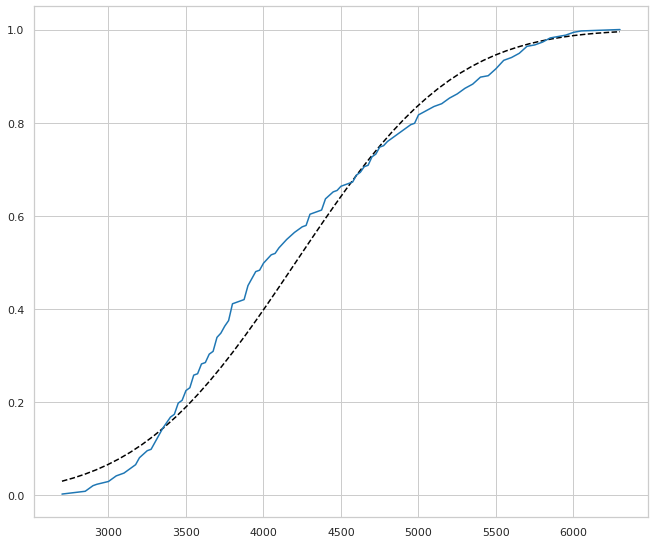

In [ ]:
#generamos datos aleatorios para comparar la distrubicion de nuestros datos
xs = np.linspace(stats_mass['min'], stats_mass['max'])
#generaremos los valores de y con la libreria de scipy que nos ayudara a
#asignarles valores de una distribucion normal
ys= scipy.stats.norm(stats_mass['mean'], stats_mass['std']).cdf(xs)

plt.plot(xs, ys, color='black', linestyle='dashed')

#graficamos con empiricaldist
empiricaldist.Cdf.from_seq(
    processed_pinguins.body_mass_g,
    normalize=True
).plot()

#con esta grafica sabemos que la distribucion no es la correcta

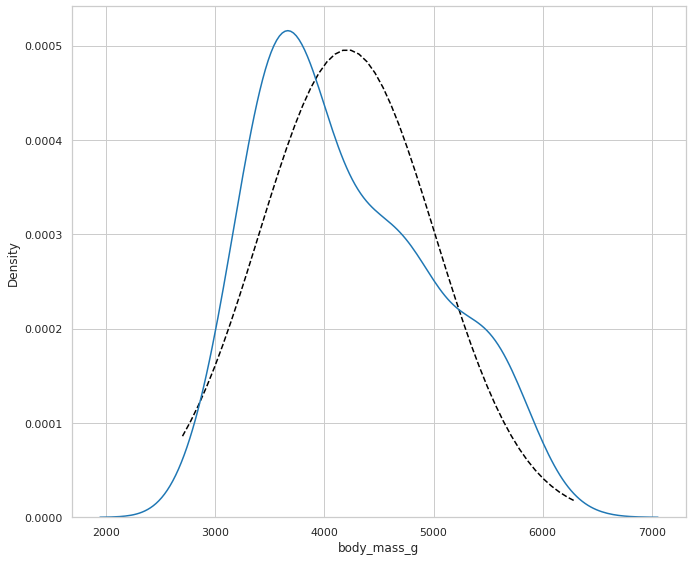

In [ ]:
#ahora hacemos la comparacion con el pdf (Funcion de probabilidad de densidad)
xs = np.linspace(stats_mass['min'], stats_mass['max'])
ys= scipy.stats.norm(stats_mass['mean'], stats_mass['std']).pdf(xs)

plt.plot(xs, ys, color='black', linestyle='dashed')

#en vez de hacerlo con empiricadist se hace con searbon
# sns.displot(
#     data=processed_pinguins,
#     x='body_mass_g',
#     kind='kde'
# )
# plt.show()
sns.kdeplot(
    data=processed_pinguins,
    x='body_mass_g'
)

# Ley de los Grandes Números y Teorema del Límite Central

## Ley de los Grandes Números

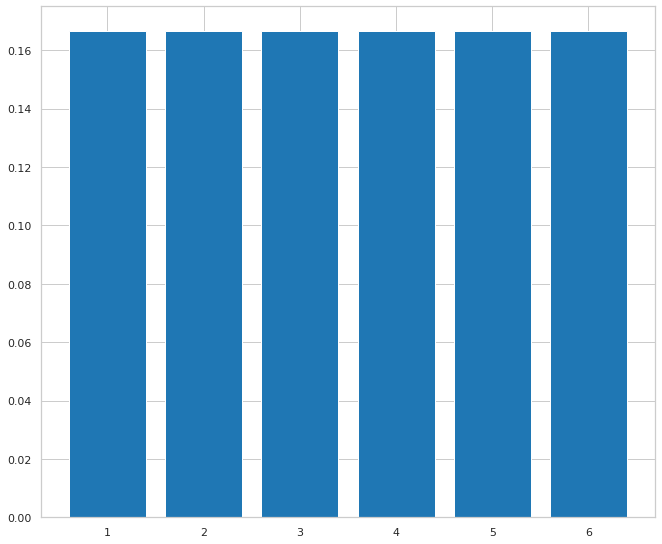

In [ ]:
#hacemos un dado con las posibilidades de que salga cada cara
dice =  empiricaldist.Pmf.from_seq([1,2,3,4,5,6])
dice.bar()

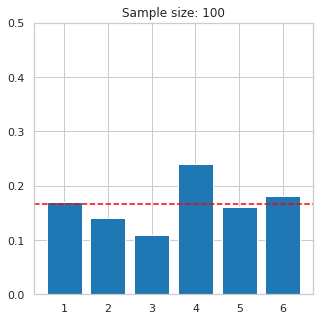

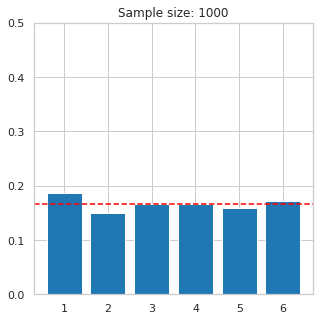

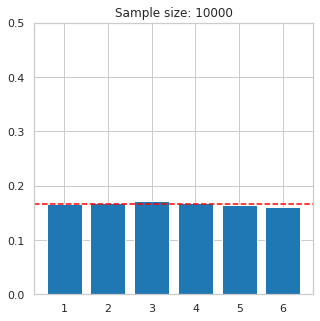

In [ ]:
#podemos ver que mientras hacemos pruebas con mas grandes numeros
#las probabilides de que salga una cara se igualan a las demas
for sample_size in (1e2, 1e3, 1e4):
    sample_size = int(sample_size)
    values = dice.sample(sample_size)
    sample_pmf = empiricaldist.Pmf.from_seq(values)

    plt.figure(figsize=(5,5))
    sample_pmf.bar()
    plt.axhline(y=1/6, color='red', linestyle='dashed')
    plt.ylim([0,0.50])
    plt.title(f'Sample size: {sample_size}')

## Teorema del Límite Central

In [ ]:
sex_numeric = processed_pinguins.sex.replace(['male','famela'],[1,0])

In [ ]:
number_samples = 1000
sample_size = 35

np.random.seed(42)

# definimos el DataFrame en blanco con su tamaño definido
samples_df = pd.DataFrame(np.random.randint(1, sample_size, size =(sample_size, number_samples)))
# Le asignamos nombres a las columnas.
col_names = []
for i in range(1, number_samples + 1):    
    col_names.append(f"sample_{i}")
samples_df.columns = col_names


for i in range(1, number_samples + 1):
    sex_numeric_sample = sex_numeric.sample(sample_size, replace=True).to_numpy()    
    sample_name = f"sample_{i}"
    samples_df[sample_name] = sex_numeric_sample

male_population_mean = samples_df.mean().mean()
print(f"El porcentaje estimado de pingüinos machos en la población es: {male_population_mean * 100:.4f}%")

El porcentaje estimado de pingüinos machos en la población es: nan%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [ ]:
# sample_means_binomial = pd.DataFrame(samples_df.mean(), columns=['sample_mean'])
# sns.kdeplot(data=sample_means_binomial)
# plt.axvline(x=sex_numeric.mean(), color='red', linestyle='dashed')

In [ ]:
# sample_size_experiment = pd.DataFrame(
#     [[i, samples_df.iloc[:, 0:i].mean().mean().mean()] for i in range(1, number_samples + 1)],
#     columns=['sample_size', 'estimated_mean']
# )

In [ ]:
# sns.scatterplot(
#     data=sample_size_experiment,
#     x='sample_size',
#     y='estimated_mean'
# )

# plt.axhline(
#     y=sex_numeric.mean(),
#     color='red',
#     linestyle='dashed'
# )

# plt.ylim([sex_numeric.mean() - 0.20, sex_numeric.mean() + 0.20])

# Estableciendo relaciones: Gráfica de puntos

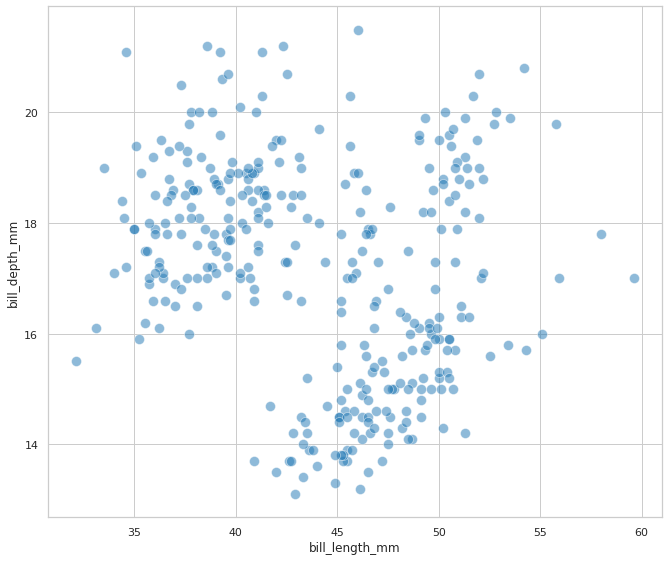

In [ ]:
sns.scatterplot(
    data=processed_pinguins,
    x='bill_length_mm',
    y='bill_depth_mm',
    alpha=1/2,
    s=100
)

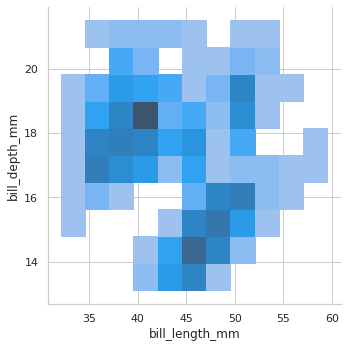

In [ ]:
#con este grafico podemos ver cual es la zona donde hay mas cantidad de datos
#esto lo sabemos por el color del mismo
sns.displot(
    data=processed_pinguins,
    x='bill_length_mm',
    y='bill_depth_mm'
)

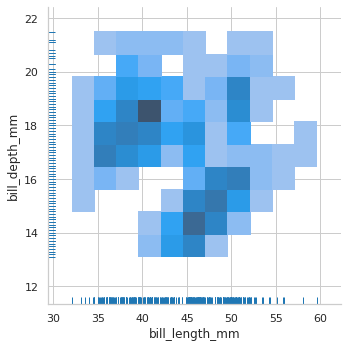

In [ ]:
#con este grafico podemos ver cual es la zona donde hay mas cantidad de datos
#esto lo sabemos por el color del mismo, con rug podemos ver en donde hay mas
#cantidad de datos
sns.displot(
    data=processed_pinguins,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug= True
)

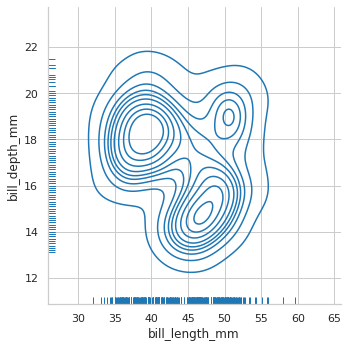

In [ ]:
#con este grafico podemos ver cual es la zona donde hay mas cantidad de datos
#esto lo sabemos por el color del mismo, con rug podemos ver en donde hay mas
#cantidad de datos
#y con kind podemos espesificar que tipo de grafico necesitamos
sns.displot(
    data=processed_pinguins,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug= True,
    kind='kde'
)

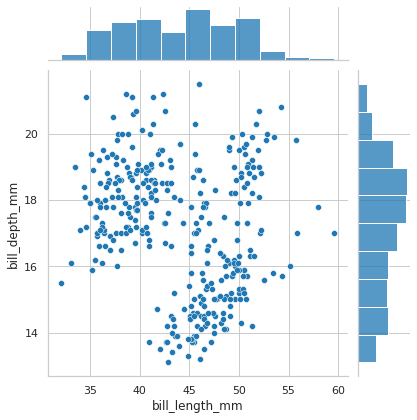

In [ ]:
#recordamos que con joinplot podemos unir nuestra grafica con uno par de 
#histogramas en el eje X y Y
sns.jointplot(
    data=processed_pinguins,
    x='bill_length_mm',
    y='bill_depth_mm'
)

In [ ]:
processed_pinguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


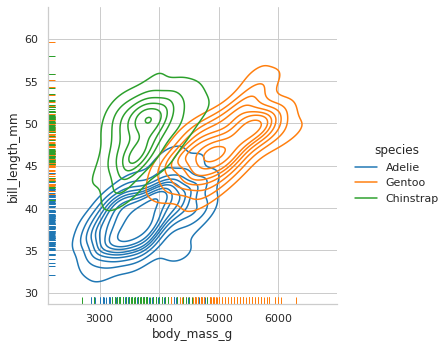

In [ ]:
#Ejemplo de como seria comparando las longitud de las alas con la masa corporal
sns.displot(
    data=processed_pinguins,
    x='body_mass_g',
    y='bill_length_mm',
    rug= True,
    hue='species',
    kind='kde'
)

# Estableciendo relaciones: Gráficos de violín y boxplots

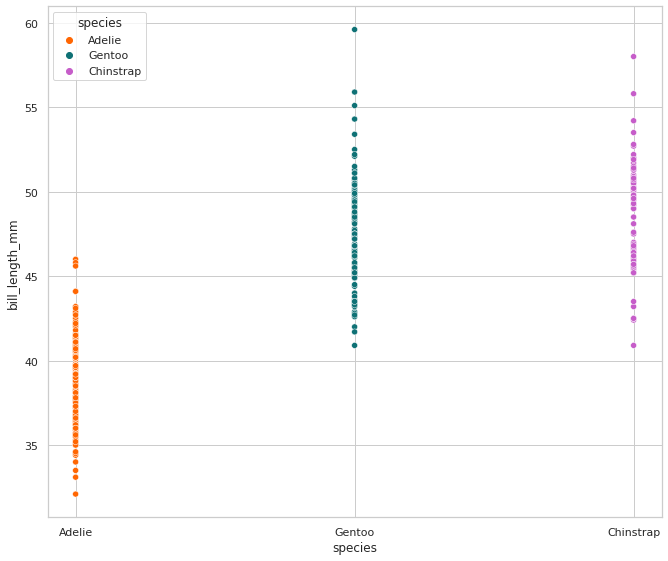

In [ ]:
#podemos ver que si hacemos este tipo de graficos con una variable categorica 
#no podemos ver bien la distribucion por lo que es recomendable usar otro
#tipo de grafico o ordenarlos de manera diferente
sns.scatterplot(
    data=processed_pinguins,
    x='species',
    y='bill_length_mm',
    hue='species',
    palette= penguin_color
)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  


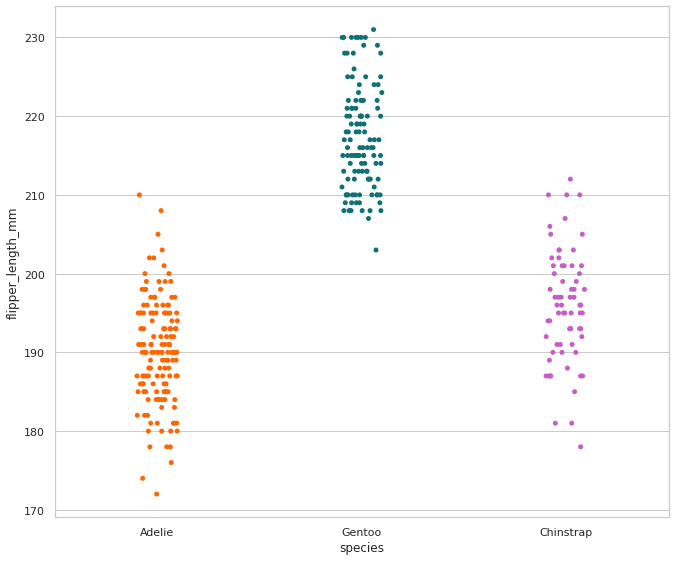

In [ ]:
#con esta grafica podemos repartir de mejor manera nuestros puntos
sns.stripplot(
    data=processed_pinguins,
    x='species',
    y='flipper_length_mm',
    palette=penguin_color
)

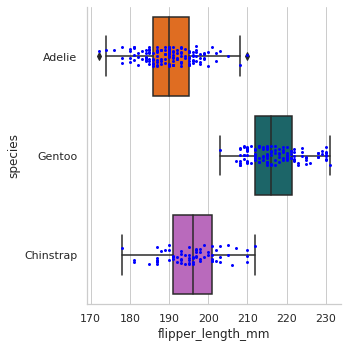

In [ ]:
#con esto hacemos graficos de caja
#tambien podemos hacerlo con sns.boxplot pero lo hacemos con carplot
#por que nos permite cambiar a otro tipo de grafica con el atributo kind
ax = sns.catplot(
    data=processed_pinguins,
    x='flipper_length_mm',
    y='species',
    kind='box',
    palette=penguin_color
)

#podemos combinar graficos para agregar puntos clave que no se verian 
#solamente con el grafico de box
ax = sns.stripplot(
    data=processed_pinguins,
    x='flipper_length_mm',
    y='species',
    s=3,
    color='blue'
)


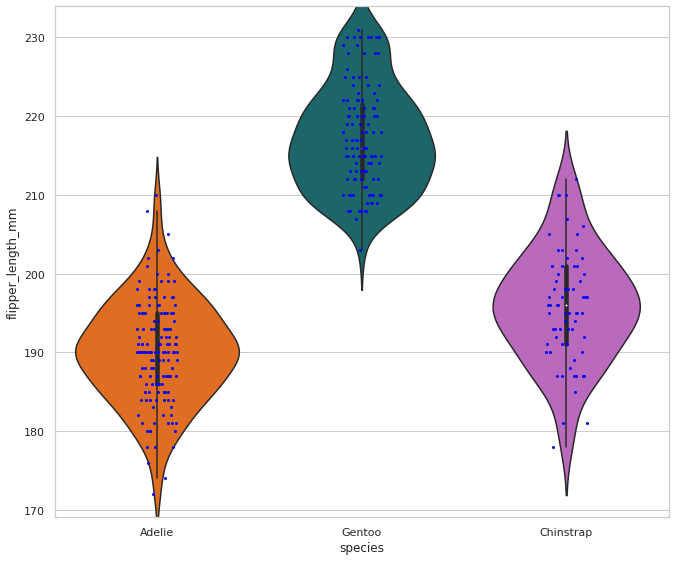

In [ ]:
#Como lo vimos en entiguos cursos, podemos hacer todo tipo de graficos como los
#de violin
axs=sns.violinplot(
    data=processed_pinguins,
    x='species',
    y='flipper_length_mm',
    palette=penguin_color
)

#al igual que con los boxplot podemos unirlo con otros graficos
#podemos combinar graficos para agregar puntos clave que no se verian 
#solamente con el grafico de box
axs = sns.stripplot(
    data=processed_pinguins,
    x='species',
    y='flipper_length_mm',
    s=3,
    color='blue'
)


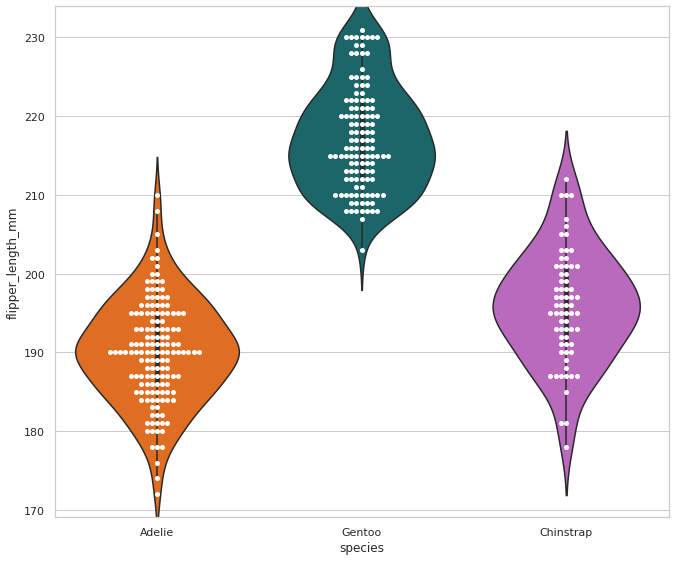

In [ ]:
#por ultimo veremos como hacer otro tipo de graficos los cuales
#ordenen en un punto espesifico a nuestros puntos


#copiamos los graficos de la celda enterior
axs=sns.violinplot(
    data=processed_pinguins,
    x='species',
    y='flipper_length_mm',
    palette=penguin_color
)

axs=sns.swarmplot(
    data=processed_pinguins,
    x='species',
    y='flipper_length_mm',
    color='white'
)

# Estableciendo relaciones: Matrices de correlación

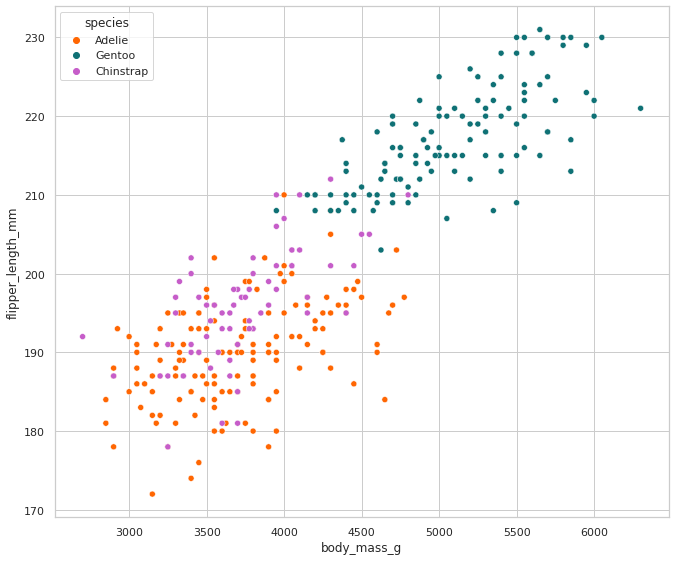

In [ ]:
#Revisamos si las variables del la longuitos del osico y el paso del pinguino
#estan correlacionadas
sns.scatterplot(
    data=processed_pinguins,
    x='body_mass_g',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

## ¿Existe una correlación lineal entre alguna de nuestras variables?

In [ ]:
#podemos ver la correlacion de nuestro dataset con el siguiente metodo
processed_pinguins.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.032657
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.048182
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.151068
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.021862
year,0.032657,-0.048182,0.151068,0.021862,1.000000


## ¿Cómo puedo visualizar los coeficientes de correlación?

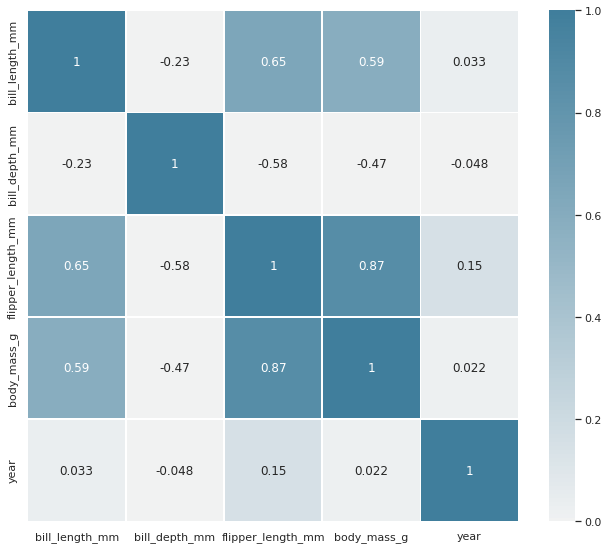

In [ ]:
#con este heatmap podemos ver cuales con los campos que tiene mas correlacion
#como vemos cuando lo comparamos con el mismo campo tiene una correlacion de 1
#que es lo mayor, cuando comparamos el paso con el largo de las alas,
sns.heatmap(
    processed_pinguins.corr(),
    #elegimos una paleta de colores
    cmap = sns.diverging_palette(28, 230, as_cmap=True),
    center = 0,
    vmin = 0,
    vmax = 1,
    linewidths = 0.5,
    annot = True
)

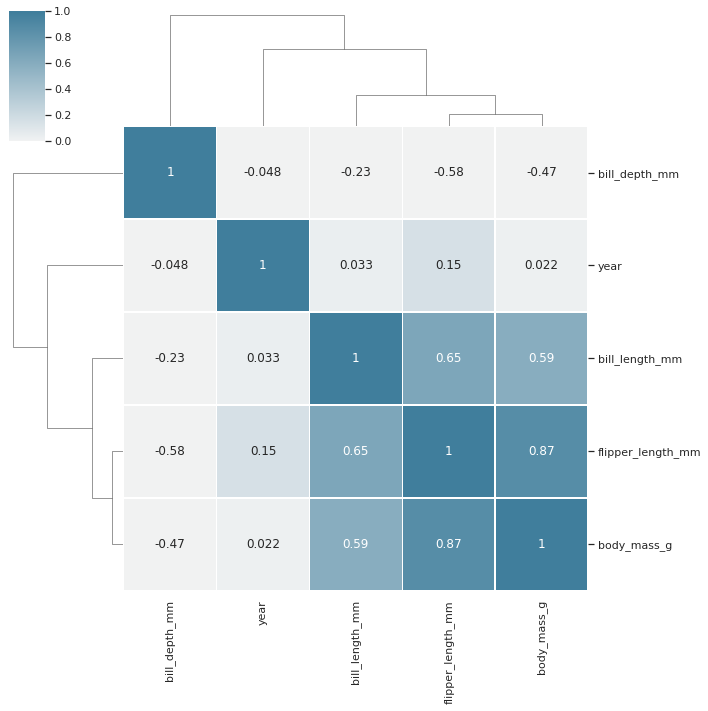

In [ ]:
#Si queremos ordenar las correlaciones de las mas grandes a las menores
#podemos hacerlo de esta manera (slustermap)
sns.clustermap(
    processed_pinguins.corr(),
    #elegimos una paleta de colores
    cmap = sns.diverging_palette(28, 230, as_cmap=True),
    center = 0,
    vmin = 0,
    vmax = 1,
    linewidths = 0.5,
    annot = True
)

## ¿Cómo podría representar una variable categórica como númerica discreta?

In [ ]:
#Para este ejemplo pasaremos el valor del sexo de nuestros pinguinos a valores
#numericos
processed_pinguins = (
    processed_pinguins
    .assign(
        numeric_sex=lambda df: df.sex.replace(['male','female'],[0,1])
    )
)
processed_pinguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,numeric_sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,0
...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,0
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,1
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,0
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,0


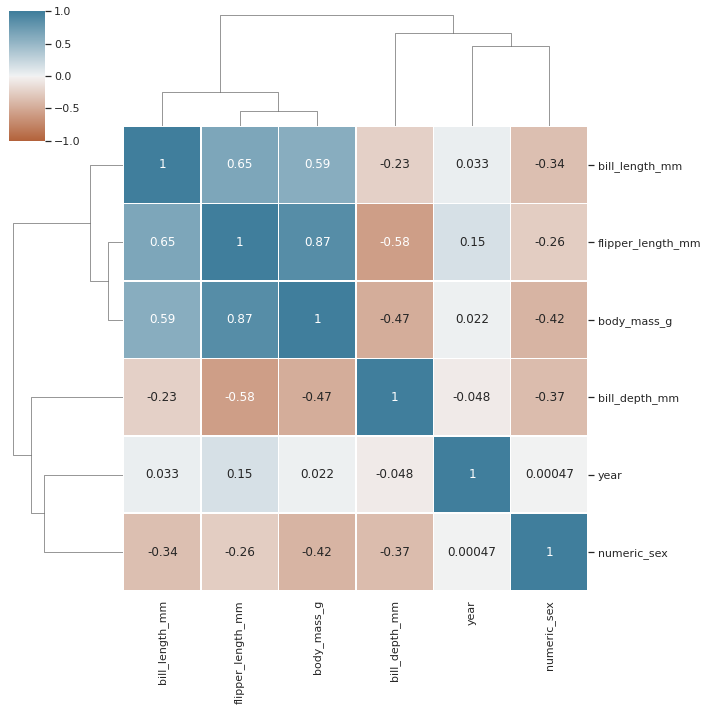

In [ ]:
#lueego volvemos a graficar
sns.clustermap(
    processed_pinguins.corr(),
    #elegimos una paleta de colores
    cmap = sns.diverging_palette(28, 230, as_cmap=True),
    center = 0,
    vmin = -1,
    vmax = 1,
    linewidths = 0.5,
    annot = True
)

## ¿Cuál es una limitante de los coeficientes de correlación lineal?

### Solo nos ayuda a determinar la posible existencia de una correlación lineal; sin embargo, su ausenecia no significa que no exista otro tipo de correlación, pues puede existiro correlacion logaritmica, exponencial, etc

array([[1.        , 0.03162206],
       [0.03162206, 1.        ]])

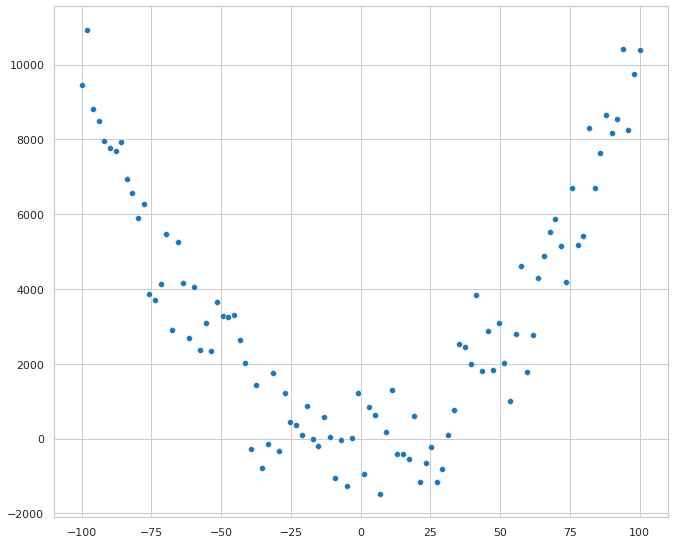

In [ ]:
#hacemos un conjuntos de datos aleatorios, con no.corrcoe podemos ver cuanta
#correlacion tienen estas varaibles

x= np.linspace(-100,100,100)
#si lo elevamos al cuadraro(2) o cubo(3) 
y=x**2
y += np.random.normal(0,1000, x.size)

sns.scatterplot(x=x, y=y)

np.corrcoef(x,y)

array([[1.       , 0.9165899],
       [0.9165899, 1.       ]])

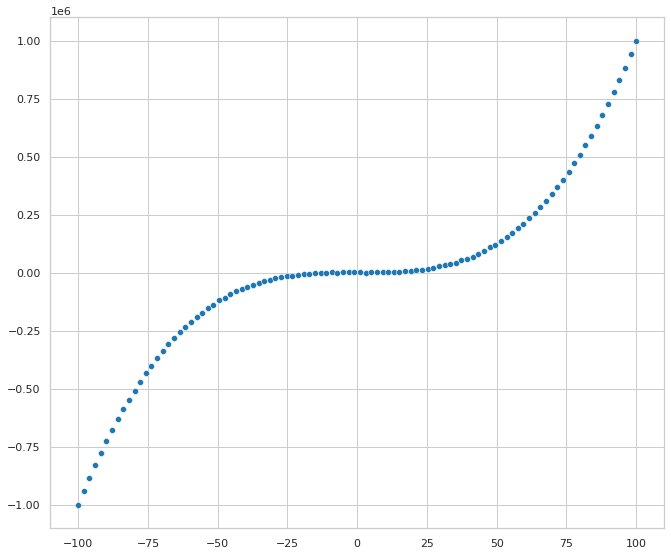

In [ ]:
#hacemos un conjuntos de datos aleatorios, con no.corrcoe podemos ver cuanta
#correlacion tienen estas varaibles

x= np.linspace(-100,100,100)
#si lo elevamos al cuadraro(2) o cubo(3) 
y=x**3
y += np.random.normal(0,1000, x.size)

sns.scatterplot(x=x, y=y)

np.corrcoef(x,y)

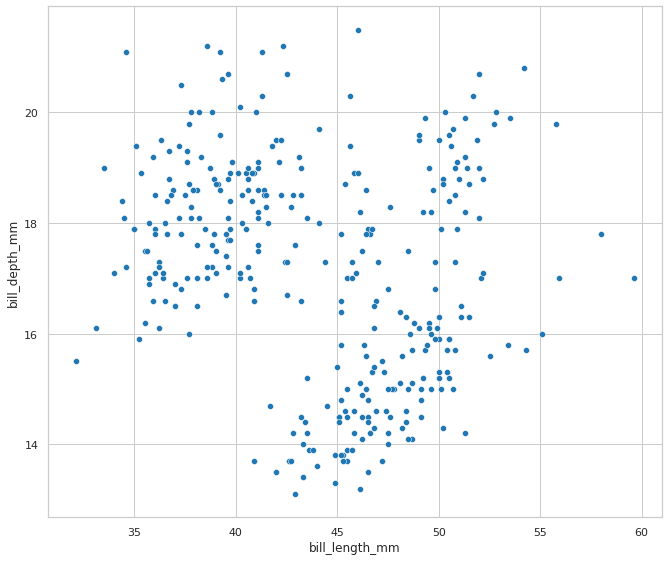

In [ ]:
sns.scatterplot(
    data=processed_pinguins,
    x='bill_length_mm',
    y='bill_depth_mm'
)

### El coeficiente de correlación no nos habla del impacto de la relación

[[1.         0.92761617]
 [0.92761617 1.        ]]
[[1.         0.67476343]
 [0.67476343 1.        ]]


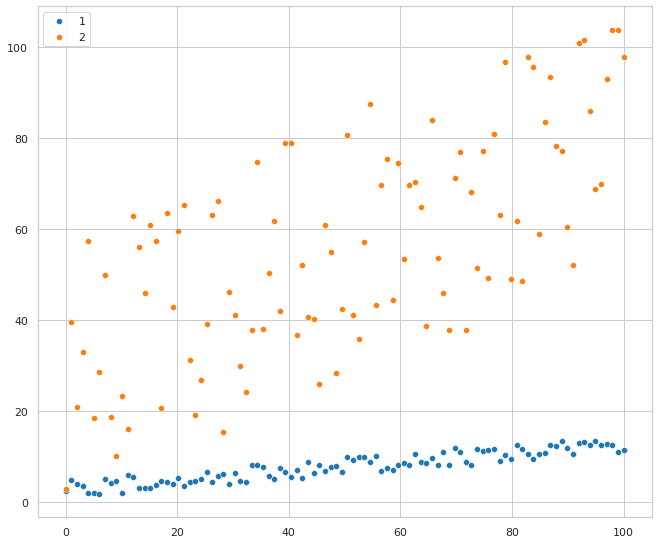

In [ ]:
#Esto quiere decir que aunque aun que un grupo de datos tenga mas la correlacion
#nosotros debemos analisar el impacto de la relacion
np.random.seed(42)
x1 = np.linspace(0,100,100)
y1 = 0.1* x1 +3 + np.random.uniform(-2,2,size=x1.size)

sns.scatterplot(x=x1, y=y1)


x2 = np.linspace(0,100,100)
y2 = 0.5* x1 +1 + np.random.uniform(0,60,size=x2.size)

sns.scatterplot(x=x2, y=y2)

plt.legend(["1","2"])

print(np.corrcoef(x1,y1))
print(np.corrcoef(x2,y2))

# Estableciendo relaciones: Análisis de regresión simple

In [ ]:
#tendremos un ejemplo de como una regresion lineal de A-B no es igual a una de 
#B-A
res_1 = scipy.stats.linregress(x=x1, y=y1)
res_2 = scipy.stats.linregress(x=x2, y=y2)

#slope: cuanto cambia cada punto
#intercept: en donde se corta nuestro eje Y

print(res_1, res_2, sep='\n')

LinregressResult(slope=0.10081969280979615, intercept=2.8397383330230292, rvalue=0.9276161661149585, pvalue=1.0607043467839354e-43, stderr=0.004101050284084736, intercept_stderr=0.2373714102742458)
LinregressResult(slope=0.5470008424819226, intercept=28.519861265205236, rvalue=0.6747634267657527, pvalue=1.388369987899253e-14, stderr=0.06043657503136455, intercept_stderr=3.498107570885824)


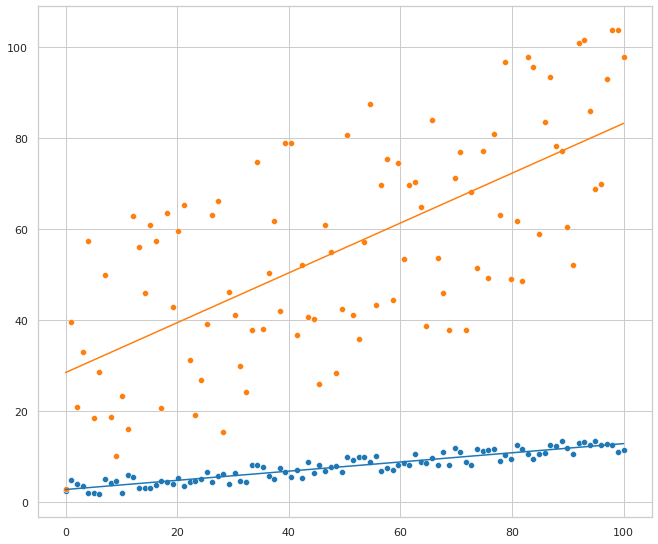

In [ ]:
#graficamos nuestras lineas
sns.scatterplot(
    x=x1,
    y=y1
)

fx1 = np.array([x1.min(), x1.max()])
fy1 = res_1.intercept + res_1.slope * fx1

plt.plot(fx1, fy1)

sns.scatterplot(
    x=x2,
    y=y2
)


fx2 = np.array([x2.min(), x2.max()])
fy2 = res_2.intercept + res_2.slope * fx2

plt.plot(fx2, fy2)


LinregressResult(slope=-0.08232675339862275, intercept=20.786648668433827, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)


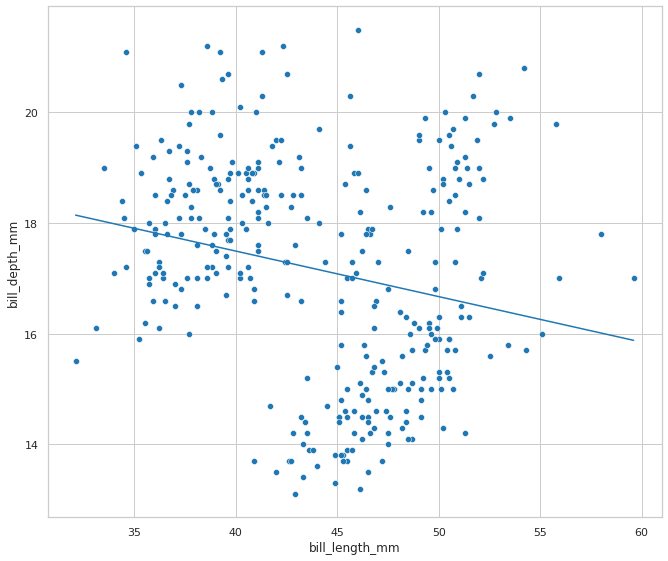

In [ ]:
from scipy.stats.stats import linregress
sns.scatterplot(
    data=processed_pinguins,
    x='bill_length_mm',
    y='bill_depth_mm'
)

#intenteremos realizar una linea para graficar nuestra regresion lineal
res_pinguis = scipy.stats.linregress(
    x=processed_pinguins.bill_length_mm,
    y=processed_pinguins.bill_depth_mm
)

print(res_pinguis)

fx1 = np.array([processed_pinguins.bill_length_mm.min(), processed_pinguins.bill_length_mm.max()])
fy1 = res_pinguis.intercept + res_pinguis.slope * fx1

plt.plot(fx1, fy1)

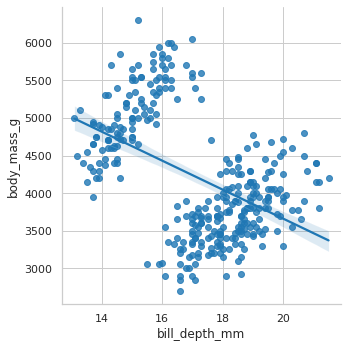

In [ ]:
#ahora haremos el mismo grafico pero con la libreria de searbon
#pero con esta libreria no podriamos obtener los indices de  slope y intecept
sns.lmplot(
    data=processed_pinguins,
    x='bill_depth_mm',
    y='body_mass_g',
)

# Limitaciones del análisis de regresión simple

## La regresión lineal simple no es simétrica

In [ ]:
#por decir que la regresin lineal siempre no es simetrica se refiere a que la 
#regresion lineal de A-B no es la misma de B-A, esto lo podemos comprobar
#graficando ambas regresiones lineales

#inicilializaremos dos variables como la profundidad y altura de nuestras alas
x= processed_pinguins.bill_length_mm
y = processed_pinguins.bill_depth_mm

#capturaremos los valores de sus regresiones lineales 
res_xy = scipy.stats.linregress(x=x, y=y)
res_yx = scipy.stats.linregress(x=y, y=x)

#como podemos ver no tenemos los mismo valores
print(res_xy, res_yx, sep='\n')

LinregressResult(slope=-0.08232675339862275, intercept=20.786648668433827, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)
LinregressResult(slope=-0.6349051704195019, intercept=54.89085424504755, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.1485977821662331, intercept_stderr=2.5673415135382553)


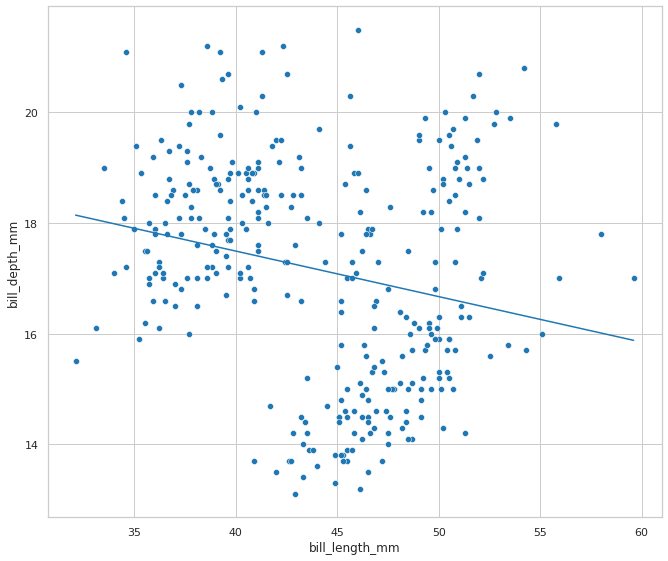

In [ ]:
#graficamos una de nuestras regresiones (X,Y)
sns.scatterplot(
    x=x,
    y=y
)

fx1 = np.array([x.min(), x.max()])
fy1 = res_xy.intercept + res_xy.slope * fx1

plt.plot(fx1, fy1)

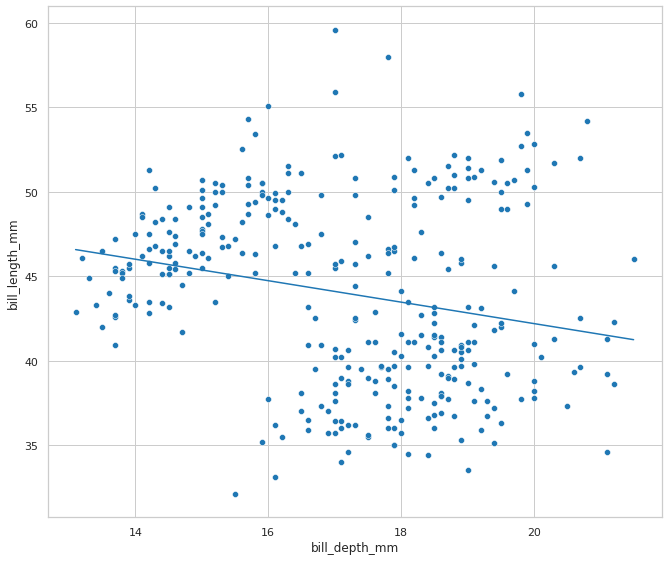

In [ ]:
#Graficamos nuestra regresion de YX
#graficamos una de nuestras regresiones (X,Y)
sns.scatterplot(
    x=y,
    y=x
)

fx2 = np.array([y.min(), y.max()])
fy2 = res_yx.intercept + res_yx.slope * fx2

plt.plot(fx2, fy2)


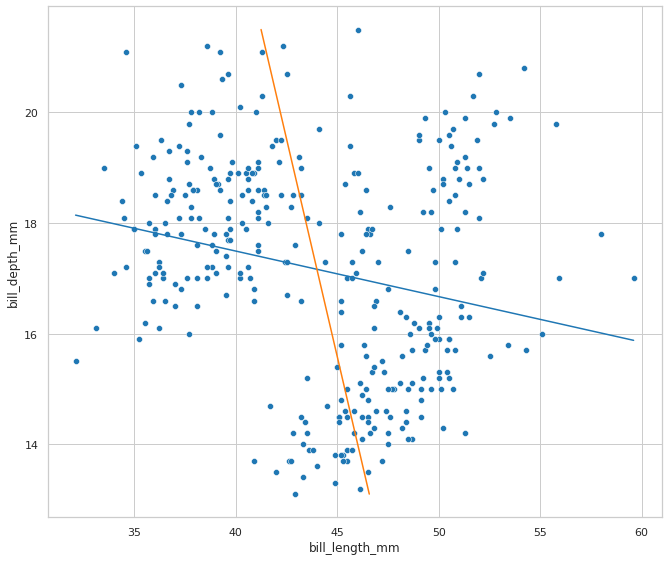

In [ ]:
#cuando graficamos las dos regresiones lineales son diferentes 
sns.scatterplot(
    x=x,
    y=y
)

plt.plot(fx1, fy1)
plt.plot(fy2, fx2)

In [ ]:
processed_pinguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,numeric_sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,0
...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,0
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,1
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,0
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,0


## La regresión no nos dice nada sobre la causalidad, pero existen herramientas para separar las relaciones entre múltiples variables

In [ ]:
#sacamos los datos de una de nuestras regresiones
(
    smf.ols(
        formula='bill_length_mm ~ bill_depth_mm',
        data=processed_pinguins 
    )
    .fit()
    .params
)

Intercept        54.890854
bill_depth_mm    -0.634905
dtype: float64

In [ ]:
#sacamos los datos de una de nuestras regresiones, como podemos ver
#no es igual a la otra
(
    smf.ols(
        formula='bill_depth_mm ~ bill_length_mm',
        data=processed_pinguins 
    )
    .fit()
    .params
)

Intercept         20.786649
bill_length_mm    -0.082327
dtype: float64

# Análisis de regresión múltiple

## Olvidé mi báscula para pesar a los pingüinos, ¿cuál sería la mejor forma de capturar ese dato?

Tendremos que medir el peso de cada pinguino a partir de las correlaciones de cada una de los otros datos

### Creando modelos

#### Modelo 1

In [ ]:
#para crear nuestro modelo lo haremos con la liberia que vimos anteriormente
model_1 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm',
        data=processed_pinguins
    )
    .fit()
)

#podemos ver como el peso tiene un R de 0.345
#por cada mm de fill length cmabian 86 gramos de mass
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           1.54e-32
Time:                        16:24:45   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Modelo 2

In [ ]:
#vemos la correlacion entre el paso y varias variables
model_2 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm +  bill_depth_mm',
        data=processed_pinguins
    )
    .fit()
)


model_2.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           7.04e-46
Time:                        16:24:45   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Modelo 3

In [ ]:
#vemos la correlacion entre el paso y varias variables
model_3 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm +  bill_depth_mm + flipper_length_mm',
        data=processed_pinguins
    )
    .fit()
)


model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Thu, 01 Dec 2022   Prob (F-statistic):          9.26e-103
Time:                        16:24:45   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Modelo 4

In [ ]:
#como vemos mientras mas variables capturamos mas valor en R osea mas variavilidad
# 
model_4 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm +  bill_depth_mm + flipper_length_mm + C(sex)',
        data=processed_pinguins
    )
    .fit()
)


model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Thu, 01 Dec 2022   Prob (F-statistic):          6.28e-122
Time:                        16:24:45   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Modelo 5

In [ ]:
#pero lo importante es encontrar la variable correcta pues una sola puede 
#tener mas correlacion que la suma de varias
model_5 = (
    smf.ols(
        formula='body_mass_g ~ flipper_length_mm + C(sex)',
        data=processed_pinguins
    )
    .fit()
)


model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Thu, 01 Dec 2022   Prob (F-statistic):          3.53e-118
Time:                        16:24:46   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Visualizando resultados

#### Creación de tabla de resultados

In [ ]:
#Vamos a crear un dataframe con los valores reales del peso de los pinguinos
#y todas nuestros modelos de predicciones

#si hacemos estos calculos en deepnote podremos ver un histograma en cada titulo de cada columna y de esa manera
#compararlas mejor
models_results = pd.DataFrame(
    dict(
        actual_value = processed_pinguins.body_mass_g,
        model1_prediccion = model_1.predict(),
        model2_prediccion = model_2.predict(),
        model3_prediccion = model_3.predict(),
        model4_prediccion = model_4.predict(),
        model5_prediccion = model_5.predict(),
        species = processed_pinguins.species,
        sex = processed_pinguins.numeric_sex    
    )
)


#### ECDFs

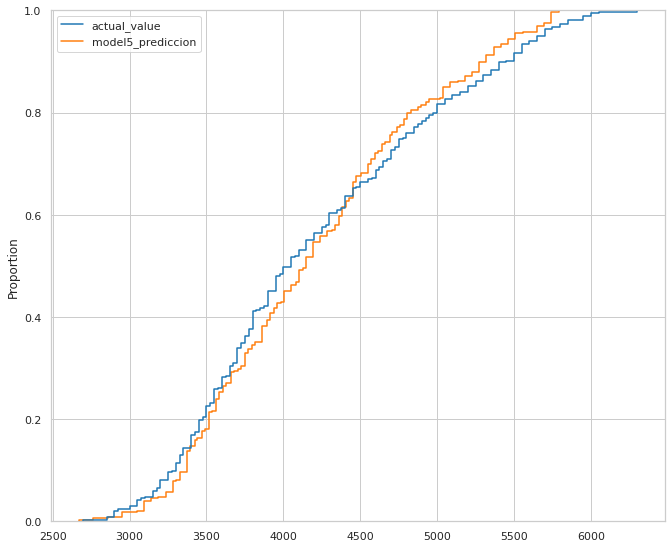

In [ ]:
#Sin embargo tambien podemos graficarlo de cierta manera con el ECDFs
#si queremos filtrar por valores espesfico podemos usar select_columns
sns.ecdfplot(
    data=models_results.select_columns(['actual_value','model5_prediccion'])
)

#### PDFs

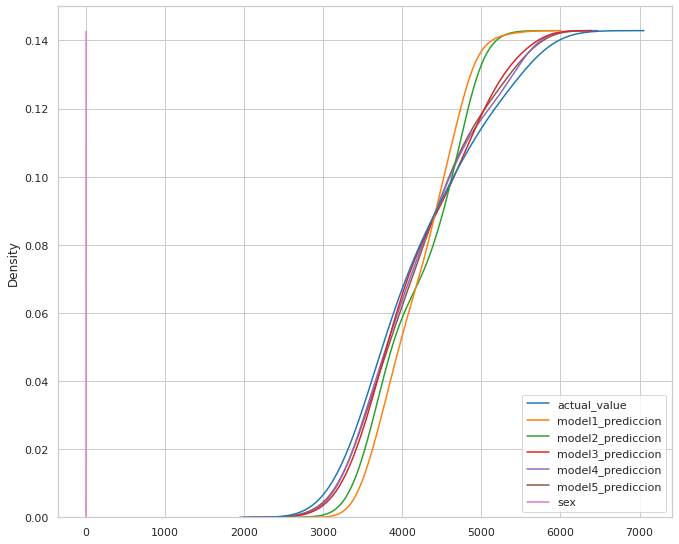

In [ ]:
#Al igual podemos usar el PDFs
sns.kdeplot(
    data=models_results,
    cumulative=True
)

#### ¿Qué pudimos haber encontrado antes de hacer los modelos?

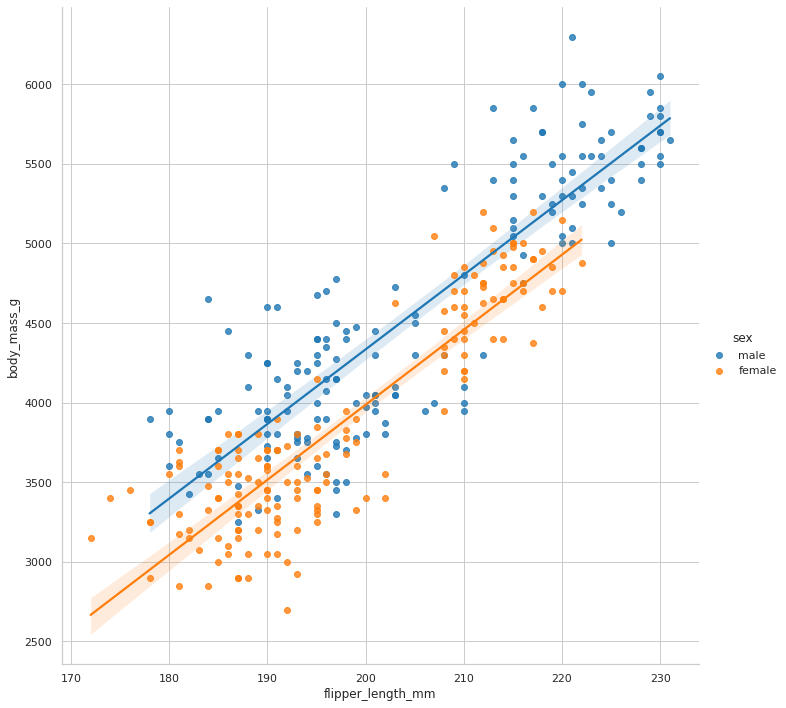

In [ ]:
#como pudimos comprar en nuestro modelos uno de los mas sercados es el 5 donde se predecia en base al largo del ala
#pero solo lo pudimos haber encontrado antes de hacer los modelos con valores al azar si tan solo
#ubiermos echo una exploracion de nuestros datos.
sns.lmplot(
    data=processed_pinguins,
    x='flipper_length_mm',
    y='body_mass_g',
    hue='sex',
    height=10
)

# Análisis de regresión logística

## ¿Podemos crear un modelo que nos ayude a definir si un pingüino es macho o hembra?

In [ ]:
#podemos crear este modelo tomando en cuenta los atributos que necesitemos.
smf.logit(
    formula='numeric_sex ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island)',
    data=processed_pinguins
).fit().summary()

Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Thu, 01 Dec 2022   Pseudo R-squ.:                  0.4793
Time:                        16:24:48   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 61.4464      6.944      8.849      0.000      47.836      75.057
C(island)[T.Dream]         1.5596      0.493      3.163      0.002       0.593       2.526
C(island)[T.Torgersen]     1.0323      0.599      1.725      0.085      -0.141       2.205
flipper_length_mm         -0.1393      0.024     -5.874      0.000      -0.186      -0.093
bill_length_mm            -0.1413      0.045     -3.150      0.002      -0.229      -0.053
bill_depth_mm             -1.6401      0.185     -8.864      0.000      -2.003      -1.277
==========================================================================================
"""

## Exploración de nuestras variables categóricas

In [ ]:
#vamos a revisar que tan bien clasifica nuestro modelo
(
    processed_pinguins
    .value_counts(['island','sex'])
    .reset_index(name='count')
)

,island,sex,count
0,Biscoe,male,83
1,Biscoe,female,80
2,Dream,male,62
3,Dream,female,61
4,Torgersen,female,24
5,Torgersen,male,23


## ¿Podemos definir un modelo que nos ayude a identificar si un pingüino pertenece a determinada clase?

In [ ]:
processed_pinguins = (
    processed_pinguins
    .assign(is_adelie= lambda df: df.species.replace(['Adelie','Gento','Chinstrap'],[1,0,0]))

)

In [ ]:
# #podemos crear este modelo tomando en cuenta los atributos que necesitemos.
# model_is_adelie = smf.logit(
#     formula='is_adelie ~ flipper_length_mm + C(sex)',
#     data=processed_pinguins
#     ).fit()

# model_is_adelie.params

# Paradoja de Simpson

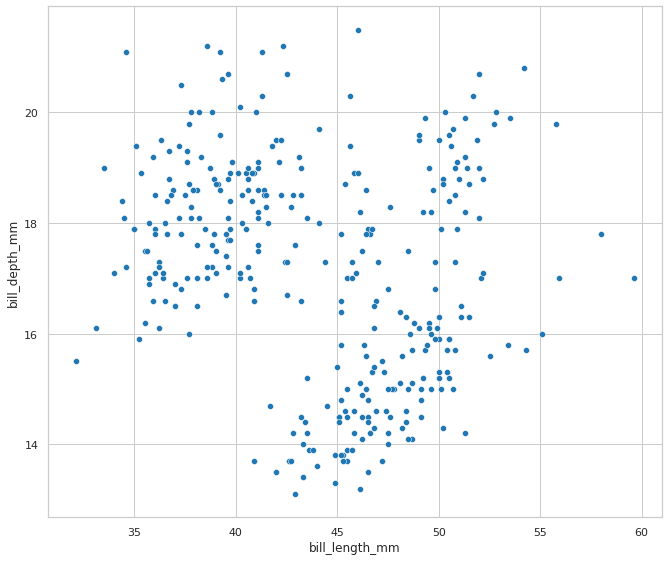

In [ ]:
#La paradoja de simpson hace referencia a que es posible concluir dos cosas totalmente opuestas con los mismos datos,
#dependiento de como se clasifiquen, para esto tendremos un ejemplo que vimos anteriormente

sns.scatterplot(
    data=processed_pinguins,
    x='bill_length_mm',
    y='bill_depth_mm'
)
#este es una grafica de correlacion entre el ancho y largo de los picos de nuestros pinguinos

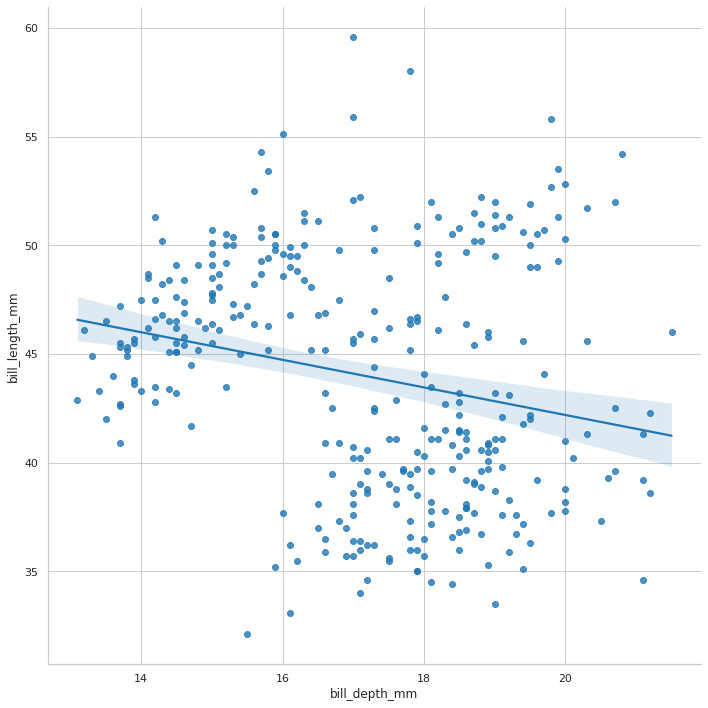

In [ ]:
#aca podemos ver su regresion lienal con la cual sabemos que a mayor ancho del pico
#menos debe ser su altura, lo cual no hace tanto sentido
sns.lmplot(
    data=processed_pinguins,
    x='bill_depth_mm',
    y='bill_length_mm',
    height=10
)

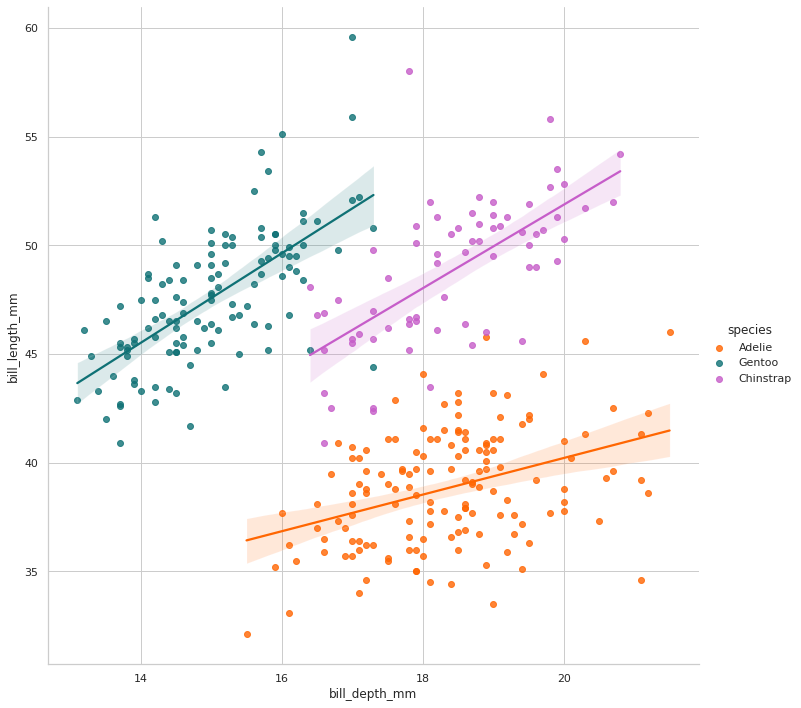

In [ ]:
#una vez calsificamos o separemos los datos por species vemos que esto nuestra regresion lineal
#se vuelve positiva.
sns.lmplot(
    data=processed_pinguins,
    x='bill_depth_mm',
    y='bill_length_mm',
    hue='species',
    palette=penguin_color,
    height=10
)

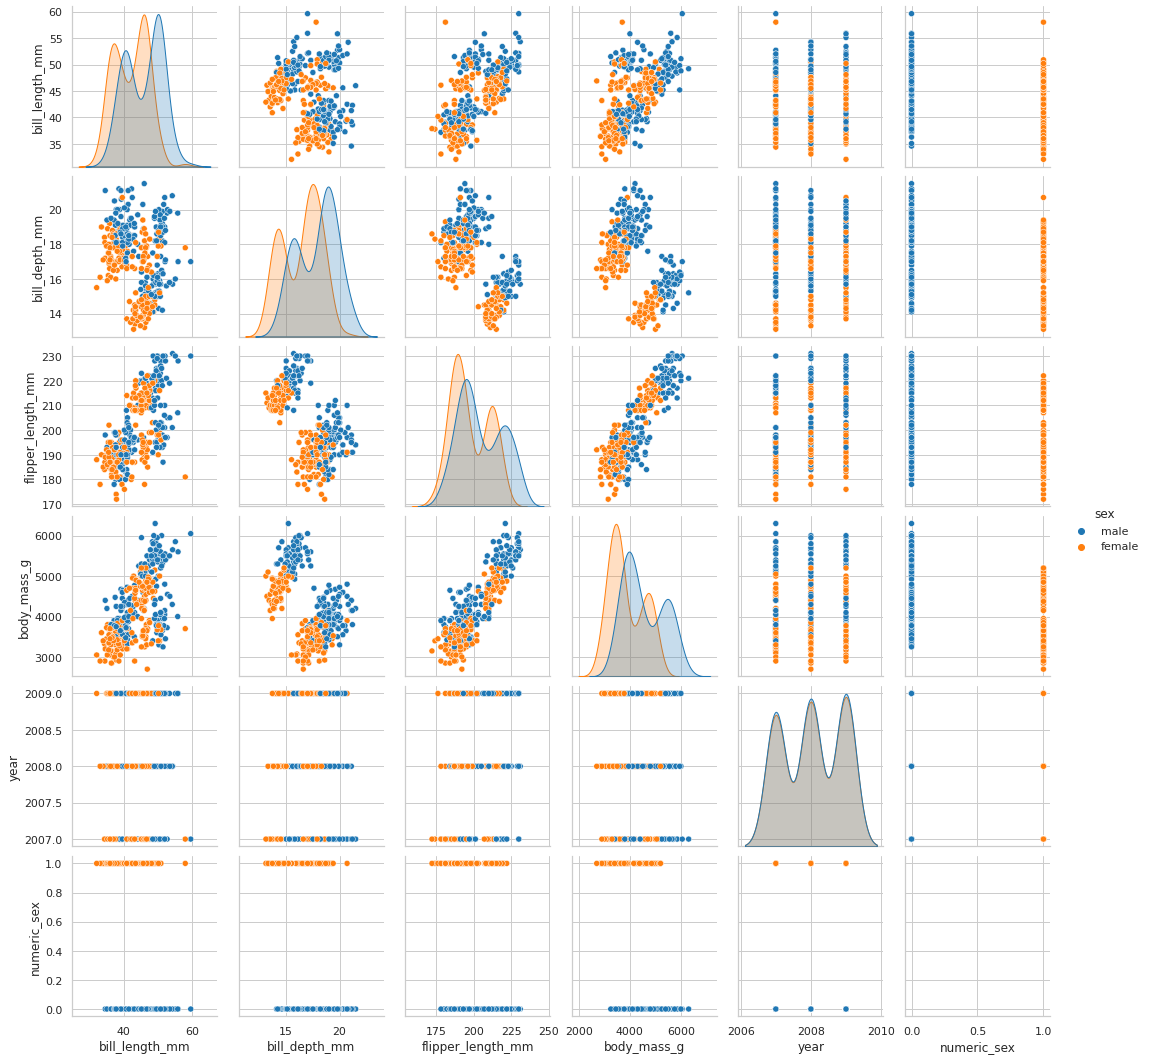

In [ ]:
#como podemos ver es muy importanta hacer una exploracion de datos antes de empezar
#a crear vizualizaciones de cada una, por lo que una manera rapida de hacer
#una exploracion es usando parplot
sns.pairplot(
    data=processed_pinguins,
    hue='sex'
)

## Información de sesión

In [ ]:
session_info.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=986bf11b-47bc-4d0a-a035-2494b28af0cc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>